


Question 1. Using the shooting method, find
the range of shooting angle of a canon to hit
the target of diameter d=1, located at distance
L=100. Set g=10 and fire speed v0=40

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integ


In [2]:
#time mesh
h=0.005
t=np.arange(0,8.0,h)

v0 = 40 #initicial velocity 
g = 10 #gravitational acceleration

#distance we want
L = 100 
d = 1

### Set the function 

In [3]:
def f(i_con,t):
	x,y,vx,vy = i_con #x_displacement, y_displacement, x_Velocity, y_velocity
	return [vx,vy,0,-g]

#### example

In [49]:
d_x = 0
theta = np.pi/6
r_theta = []

In [50]:
i_con = [0,0, v0*np.cos(theta), v0*np.sin(theta)]
sol = integ.odeint(f,i_con,t)

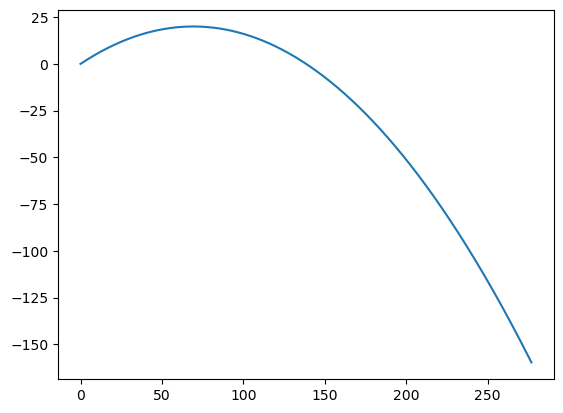

In [51]:
plt.plot(sol[:,0],sol[:,1]); plt.show()


In [54]:
for i in range(1,len(sol[:,1])):
    if sol[i,1] <= 0:
        break

print(sol[i,0])

138.5640646055102


In [45]:
sol[-1,1] # y_displacement for end

-159.70012500000362

## Find the range of shooting angle

In [38]:
d_x = 0
theta = 0 #unit : degree 
r_theta = []

In [40]:
while d_x <= L + d/2 :

    i_con = [0,0, v0*np.cos(theta*np.pi/180), v0*np.sin(theta*np.pi/180)] #degree ->radian
    sol = integ.odeint(f,i_con,t)
    
    # for measuring x-distance, take time to y-displacement < 0
    for i in range(1,len(sol[:,0])) :
        if sol[i,1] <= 0 :
            break
    
    # take x-distance
    if sol[i,1] == 0 :
        d_x = sol[i,0]
    else :
        d_x = (sol[i-1,0]+ sol[i,0])/2
    
    # if x  - distnace comes to our range we want, then get it.
    if d_x > L-d/2 :
        r_theta.append(theta)

    print(theta,d_x)
    theta += 0.1
    

0 0.1
0.1 0.49999923845664374
0.2 1.0999932984235692
0.30000000000000004 1.6999766968206247
0.4 2.299943950622408
0.5 2.699897192273263
0.6 3.2998190589061904
0.7 3.8997089416757618
0.7999999999999999 4.499561358041869
0.8999999999999999 5.099370825656468
0.9999999999999999 5.499162323360152
1.0999999999999999 6.098875843942029
1.2 6.698530579281466
1.3 7.298121048055696
1.4000000000000001 7.897641769271351
1.5000000000000002 8.297155797297128
1.6000000000000003 8.896530023859151
1.7000000000000004 9.495818671134149
1.8000000000000005 10.09501625969389
1.9000000000000006 10.694117310576802
2.0000000000000004 11.093238179911966
2.1000000000000005 11.69214220721028
2.2000000000000006 12.290933871850642
2.3000000000000007 12.889607696976354
2.400000000000001 13.488158206334589
2.500000000000001 13.886770279987827
2.600000000000001 14.485073261965363
2.700000000000001 15.08323711192575
2.800000000000001 15.681256356260516
2.9000000000000012 16.0793816506654
3.0000000000000013 16.6771132304

In [41]:
r_theta

[19.300000000000004, 19.400000000000006, 19.500000000000007]